### Cambridge Crime Data Using KMeans & Hierarchical Clustering ###

In [177]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pickle as pickle
from sklearn.preprocessing import StandardScaler

In [179]:
df = pd.read_csv('Cambridge Crime Data 2009-2016.csv')

In [181]:
df.head(5)

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56014 entries, 0 to 56013
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   File Number      56014 non-null  object 
 1   Date of Report   56014 non-null  object 
 2   Crime Date Time  56014 non-null  object 
 3   Crime            56014 non-null  object 
 4   Reporting Area   56012 non-null  float64
 5   Neighborhood     56012 non-null  object 
 6   Location         55931 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.0+ MB


In [185]:
df.isna().sum()

File Number         0
Date of Report      0
Crime Date Time     0
Crime               0
Reporting Area      2
Neighborhood        2
Location           83
dtype: int64

In [187]:
df = df.dropna()

In [189]:
#Confirm missing value has been dropped
df.isna().sum()

File Number        0
Date of Report     0
Crime Date Time    0
Crime              0
Reporting Area     0
Neighborhood       0
Location           0
dtype: int64

In [191]:
#convert date time from object to Date time
df['Date of Report'] = pd.to_datetime(df['Date of Report'], errors='coerce')
df['Crime Date Time'] = pd.to_datetime(df['Crime Date Time'], errors='coerce')
#df[['Crime Date Time', 'Date of Report']] = df[['Crime Date Time', 'Date of Report']].apply(pd.to_datetime, errors='coerce')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55929 entries, 0 to 56013
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   File Number      55929 non-null  object        
 1   Date of Report   55929 non-null  datetime64[ns]
 2   Crime Date Time  22181 non-null  datetime64[ns]
 3   Crime            55929 non-null  object        
 4   Reporting Area   55929 non-null  float64       
 5   Neighborhood     55929 non-null  object        
 6   Location         55929 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 3.4+ MB


In [193]:
df.isna().sum()

File Number            0
Date of Report         0
Crime Date Time    33748
Crime                  0
Reporting Area         0
Neighborhood           0
Location               0
dtype: int64

In [194]:
#Drop missing values in Crime Date Time
df.dropna(subset=['Crime Date Time'], inplace=True)

In [209]:
new_df = df.drop(columns=['Location', 'File Number'])
new_df.head(5)

,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood
0,2009-01-01 00:39:00,2009-01-01 00:39:00,Simple Assault,504.0,Cambridgeport
1,2009-01-01 01:34:00,2009-01-01 01:34:00,Simple Assault,610.0,Mid-Cambridge
5,2009-01-01 02:45:00,2009-01-01 02:45:00,Missing Person,507.0,Cambridgeport
6,2009-01-01 02:37:00,2009-01-01 02:37:00,Mal. Dest. Property,1108.0,North Cambridge
10,2009-01-01 12:43:00,2009-01-01 14:05:00,Trespassing,501.0,Cambridgeport


In [211]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22181 entries, 0 to 56013
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date of Report   22181 non-null  datetime64[ns]
 1   Crime Date Time  22181 non-null  datetime64[ns]
 2   Crime            22181 non-null  object        
 3   Reporting Area   22181 non-null  float64       
 4   Neighborhood     22181 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 1.0+ MB


In [213]:
df.isna().sum()

File Number        0
Date of Report     0
Crime Date Time    0
Crime              0
Reporting Area     0
Neighborhood       0
Location           0
dtype: int64

In [225]:
NB = df['Neighborhood'].unique()
CT = df['Neighborhood'].value_counts()
CT

Neighborhood
East Cambridge      3365
Cambridgeport       3271
Area 4              2660
Riverside           2077
North Cambridge     2076
Mid-Cambridge       2035
West Cambridge      1981
Inman/Harrington    1771
Peabody             1142
Highlands            486
MIT                  451
Agassiz              451
Strawberry Hill      415
Name: count, dtype: int64

In [229]:
CU = df['Crime'].unique()
CC = df['Crime'].value_counts()
CC

Crime
Domestic Dispute          2715
Warrant Arrest            2189
Simple Assault            2060
Hit and Run               1583
Shoplifting               1552
Aggravated Assault        1013
Forgery                    896
Mal. Dest. Property        812
Threats                    809
Admin Error                644
Larceny from Person        573
Drugs                      549
Accident                   529
Larceny from Building      491
Housebreak                 400
Street Robbery             399
Flim Flam                  360
Suspicious Package         360
Missing Person             347
Larceny from MV            334
OUI                        301
Harassment                 284
Taxi Violation             249
Larceny of Bicycle         246
Larceny from Residence     244
Trespassing                241
Disorderly                 223
Violation of R.O.          202
Commercial Break           138
Drinking in Public         131
Rec. Stol. Property        127
Auto Theft                 124
In

In [233]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enn = LabelEncoder()

new_df['Crime'] = enc.fit_transform(new_df['Crime'])
new_df['Neighborhood'] = enn.fit_transform(new_df['Neighborhood'])

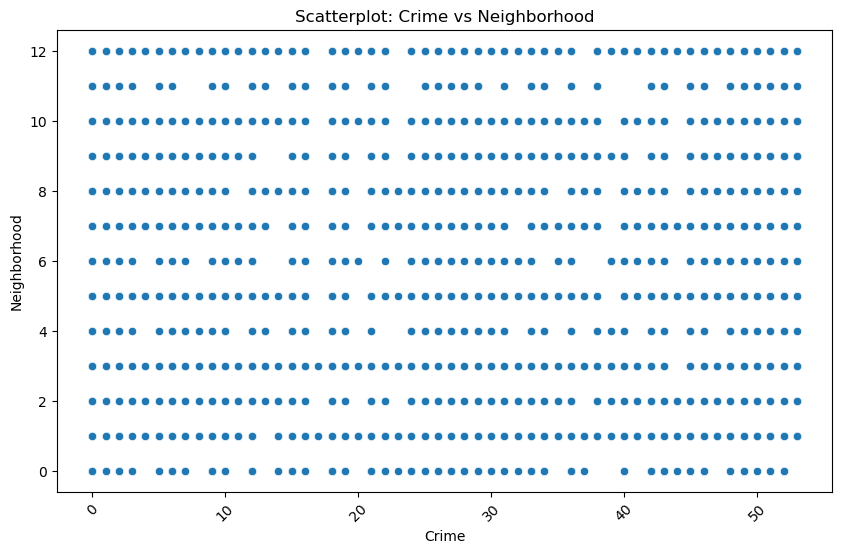

In [247]:
plt.figure(figsize=(10, 6))
sn.scatterplot(x=new_df['Crime'], y=new_df['Neighborhood'])

# Customize plot
plt.title('Scatterplot: Crime vs Neighborhood')
plt.xlabel('Crime')
plt.ylabel('Neighborhood')
plt.xticks(rotation=45)  # Rotate dates for readability
plt.show()

### Train model using KMeans Clustering

In [254]:
X = new_df.iloc[:, [2,4]].values #select columns 2 and 4
X = np.ascontiguousarray(X)

In [274]:
# Create the model with a number that might make sensebased on the visualization
from sklearn.cluster import KMeans
n_clusters = 7
modelKM = KMeans(n_clusters=n_clusters, random_state=0)
y = modelKM.fit_predict(X)
print(y)

[1 6 5 ... 5 3 6]


In [276]:
# Determine the Centroids for visualization
# (The output is the set of coordinates that we can use to visualize the centroid.)
centres=modelKM.cluster_centers_
print(centres)

[[11.53750982  5.55322074]
 [42.80811936  2.5943789 ]
 [ 1.74148852  5.73357086]
 [21.87477408  5.90885618]
 [51.07121263  4.02989587]
 [32.57008086  5.83737646]
 [44.89136276  9.56890595]]


Text(0, 0.5, 'Neighborhood')

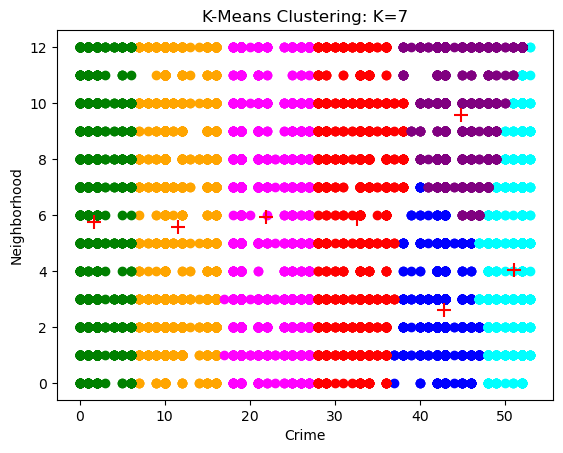

In [362]:
import matplotlib.pyplot as plt
colors = ['orange', 'blue', 'green', 'magenta', 'cyan', 'red', 'purple']
for i in range(n_clusters):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=colors[i])
plt.scatter(modelKM.cluster_centers_[:, 0], modelKM.cluster_centers_[:, 1], color='red', marker='+', s=100)
plt.title('K-Means Clustering: K=7')
plt.xlabel('Crime')
plt.ylabel('Neighborhood')

Text(0, 0.5, 'Neighbourhood')

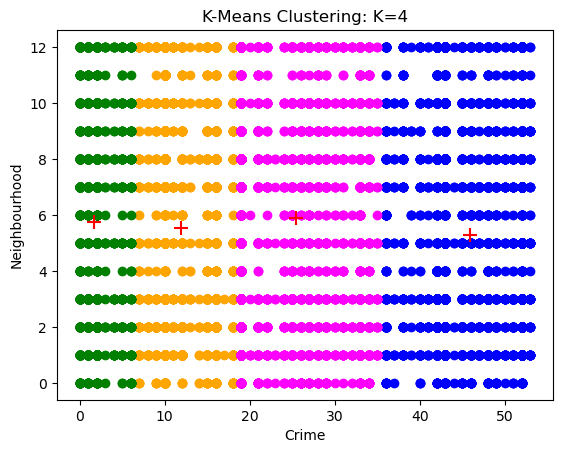

In [371]:
model2 = KMeans(n_clusters=4, random_state=0)
y2 = model2.fit_predict(X)
centres2=model2.cluster_centers_

colors = ['orange', 'blue', 'green', 'magenta', 'cyan', 'red', 'purple']
for i in range(4):
    plt.scatter(X[y2 == i, 0], X[y2 == i, 1], c=colors[i])
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], color='red', marker='+', s=100)
plt.title('K-Means Clustering: K=4')
plt.xlabel('Crime')
plt.ylabel('Neighbourhood')

### Optimize KMeans Model

Text(0, 0.5, 'SSE')

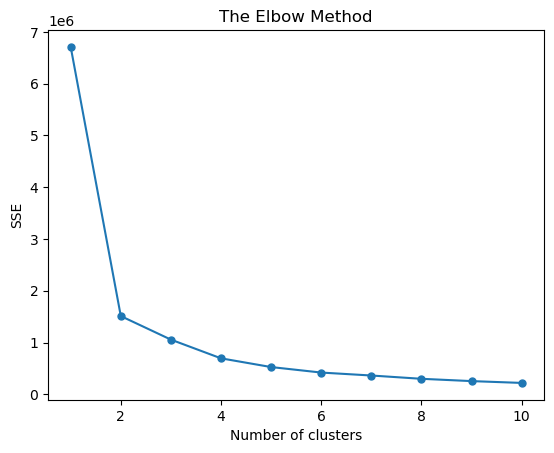

In [374]:
from sklearn.cluster import KMeans
scores = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(X)
    scores.append(model.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), scores, marker='.', markersize=10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Model Inertia

In [376]:
model3 = KMeans(n_clusters=3, random_state=0)
y3 = model3.fit_predict(X)
centres3=model3.cluster_centers_
SSE = model3.inertia_

print(f"Sum of Squared Errors (SSE) for KMeans with 3 clusters: {SSE}")

Sum of Squared Errors (SSE) for KMeans with 3 clusters: 1056301.9085320334


Sum of Squared Errors (SSE) for KMeans with 3 clusters: 1056301.9085320334


Text(0, 0.5, 'Neighbourhood')

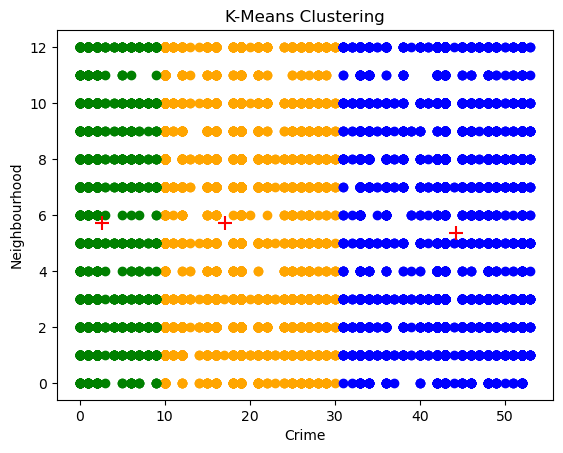

In [366]:
colors = ['orange', 'blue', 'green', 'magenta', 'cyan', 'red', 'purple']
for i in range(3):
    plt.scatter(X[y3 == i, 0], X[y3 == i, 1], c=colors[i])
plt.scatter(model3.cluster_centers_[:, 0], model3.cluster_centers_[:, 1], color='red', marker='+', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Crime')
plt.ylabel('Neighbourhood')


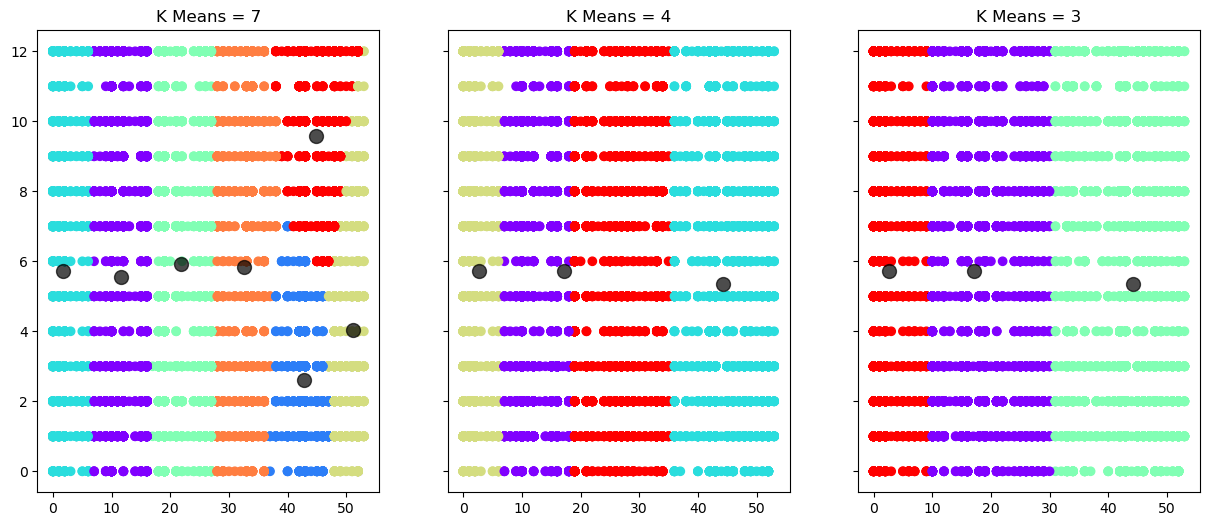

In [354]:
f, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(15,6))

ax1.set_title('K Means = 7')
ax1.scatter(X[:,0], X[:,1], c=modelKM.labels_, cmap='rainbow')
ax1.scatter(centres[:, 0], centres[:, 1], c='black', s=100, alpha=0.7)

ax2.set_title('K Means = 4')
ax2.scatter(X[:,0],X[:,1],c=model2.labels_,cmap='rainbow')
ax2.scatter(centres2[:, 0], centres2[:, 1], c='black', s=100, alpha=0.7)

ax3.set_title('K Means = 3')
ax3.scatter(X[:,0],X[:,1],c=model3.labels_,cmap='rainbow')
ax3.scatter(centres3[:, 0], centres3[:, 1], c='black', s=100, alpha=0.7)

### Hierarchical Clustering

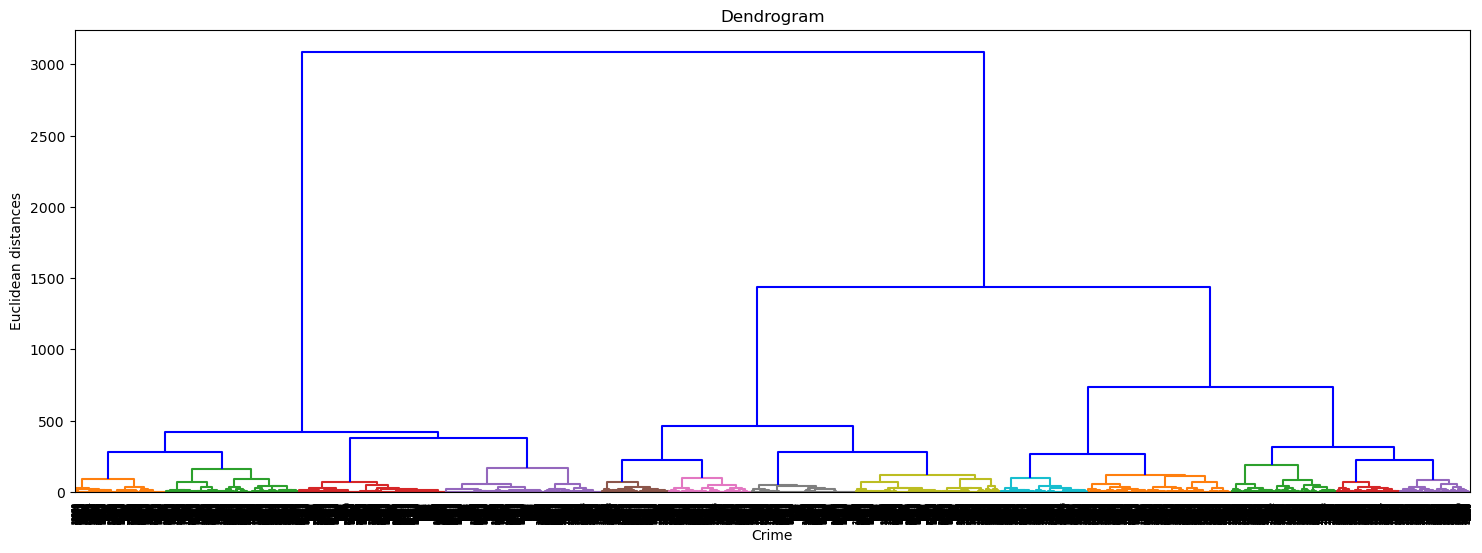

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [358]:
import scipy.cluster.hierarchy as sch

# SciKitLearn can also generate Agglomerative Clustering, (i.e. a Dendogram), but doesn't have the built-in code to plot it. The labels can be though!
from sklearn.cluster import AgglomerativeClustering

#SciPy Dendogram
plt.figure(figsize=(18,6))
plt.title('Dendrogram')
plt.xlabel('Crime')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method ='ward'),
                            color_threshold=200, 
                            above_threshold_color='blue') 
plt.show()

# SciKitLearn Agglomerative Clustering
model2 = AgglomerativeClustering(n_clusters = 5, affinity ='euclidean',
                                 linkage ='ward')
y2 = model2.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y2, cmap="rainbow")
plt.xlabel('Crime (k$)')
plt.ylabel('Neighborhood)')
plt.title("SciKitLearn Agglomerative Clustering - Crime vs Neigbourhood")
plt.show()